In [1]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

# read the specified url as a csv file, and create a pandas DataFrame variable 'cov' that contains the resulting data
cov = pd.read_csv(url, sep=',')

# print the first 3 rows
print(cov.head(3))

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0


In [2]:
# print some statistics about the data read into 'cov'
print(cov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86952 entries, 0 to 86951
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    86952 non-null  object 
 1   county  86952 non-null  object 
 2   state   86952 non-null  object 
 3   fips    85882 non-null  float64
 4   cases   86952 non-null  int64  
 5   deaths  86952 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.0+ MB
None


In [3]:
# convert date column from strings to actual date data types
cov["date"] = pd.to_datetime(cov["date"])
print(cov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86952 entries, 0 to 86951
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    86952 non-null  datetime64[ns]
 1   county  86952 non-null  object        
 2   state   86952 non-null  object        
 3   fips    85882 non-null  float64       
 4   cases   86952 non-null  int64         
 5   deaths  86952 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [4]:
# print a line between output for readability
print('-----')

# delete unnecessary column
cov.drop(columns="fips", inplace=True)

# print the first 3 rows (without the 'fips' column)
print(cov.head(3))

-----
        date     county       state  cases  deaths
0 2020-01-21  Snohomish  Washington      1       0
1 2020-01-22  Snohomish  Washington      1       0
2 2020-01-23  Snohomish  Washington      1       0


In [5]:
# print some statistics about the data read into 'cov'
print(cov.describe())

               cases        deaths
count   86952.000000  86952.000000
mean      167.740098      6.849446
std      2027.119452    127.391531
min         0.000000      0.000000
25%         2.000000      0.000000
50%         8.000000      0.000000
75%        35.000000      1.000000
max    150484.000000  11157.000000


In [6]:
# to get statistics on the columns of type 'object', we need to explicitly include that type, otherwise describe will only provide statistics on the numerical columns by default
print(cov.describe(include=np.object))

            county  state
count        86952  86952
unique        1669     55
top     Washington  Texas
freq          1042   5461


In [7]:
# print all the unique values for the 'state' column
print(cov["state"].unique())

['Washington' 'Illinois' 'California' 'Arizona' 'Massachusetts'
 'Wisconsin' 'Texas' 'Nebraska' 'Utah' 'Oregon' 'Florida' 'New York'
 'Rhode Island' 'Georgia' 'New Hampshire' 'North Carolina' 'New Jersey'
 'Colorado' 'Maryland' 'Nevada' 'Tennessee' 'Hawaii' 'Indiana' 'Kentucky'
 'Minnesota' 'Oklahoma' 'Pennsylvania' 'South Carolina'
 'District of Columbia' 'Kansas' 'Missouri' 'Vermont' 'Virginia'
 'Connecticut' 'Iowa' 'Louisiana' 'Ohio' 'Michigan' 'South Dakota'
 'Arkansas' 'Delaware' 'Mississippi' 'New Mexico' 'North Dakota' 'Wyoming'
 'Alaska' 'Maine' 'Alabama' 'Idaho' 'Montana' 'Puerto Rico'
 'Virgin Islands' 'Guam' 'West Virginia' 'Northern Mariana Islands']


In [8]:
# sort these values in alphabetical order
print(np.sort(cov["state"].unique()))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [9]:
# create a new variable dalCases that contains only the data for Dallas County
dalCases = cov[(cov["county"] == "Dallas")]
print(dalCases)

            date  county     state  cases  deaths
1133  2020-03-10  Dallas     Texas      2       0
1329  2020-03-11  Dallas     Texas      3       0
1576  2020-03-12  Dallas     Texas      8       0
1881  2020-03-13  Dallas     Texas      9       0
2059  2020-03-14  Dallas      Iowa      1       0
...          ...     ...       ...    ...     ...
84166 2020-04-24  Dallas   Alabama     32       2
84256 2020-04-24  Dallas  Arkansas      1       0
84908 2020-04-24  Dallas      Iowa     99       0
85547 2020-04-24  Dallas  Missouri      2       0
86450 2020-04-24  Dallas     Texas   2834      77

[158 rows x 5 columns]


In [10]:
# create a new variable dalCases that contains only the data for Dallas County in TEXAS
dalCases = cov[(cov["county"] == "Dallas") & (cov["state"] == "Texas")]
print(dalCases)

            date  county  state  cases  deaths
1133  2020-03-10  Dallas  Texas      2       0
1329  2020-03-11  Dallas  Texas      3       0
1576  2020-03-12  Dallas  Texas      8       0
1881  2020-03-13  Dallas  Texas      9       0
2247  2020-03-14  Dallas  Texas     11       0
2672  2020-03-15  Dallas  Texas     14       0
3140  2020-03-16  Dallas  Texas     14       0
3674  2020-03-17  Dallas  Texas     23       0
4297  2020-03-18  Dallas  Texas     34       0
5050  2020-03-19  Dallas  Texas     56       1
5941  2020-03-20  Dallas  Texas     74       1
6960  2020-03-21  Dallas  Texas     95       1
8090  2020-03-22  Dallas  Texas    132       2
9309  2020-03-23  Dallas  Texas    159       2
10651 2020-03-24  Dallas  Texas    169       5
12140 2020-03-25  Dallas  Texas    169       6
13780 2020-03-26  Dallas  Texas    303       7
15544 2020-03-27  Dallas  Texas    367       7
17425 2020-03-28  Dallas  Texas    439       9
19389 2020-03-29  Dallas  Texas    443       9
21459 2020-03

Text(0, 0.5, 'Number of People')

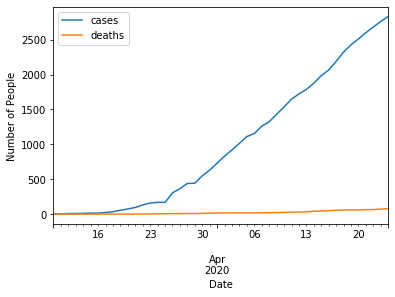

In [11]:
# import the plotting library
import matplotlib.pyplot as plt

# plot the cases and deaths in the county by date
dalCases.plot(x='date', y=['cases','deaths'])
plt.xlabel('Date')
plt.ylabel('Number of People')

In [12]:
# save the plot to a file - may not work properly in Jupyter
plt.savefig('graph.png')

<Figure size 432x288 with 0 Axes>